In [22]:
#Importing library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as it

In [23]:
#Importing IMU data
imu_data = pd.read_csv('imu_data.csv');
mag_data = pd.read_csv('mag_data.csv');
gps_data = pd.read_csv('gps_data.csv');

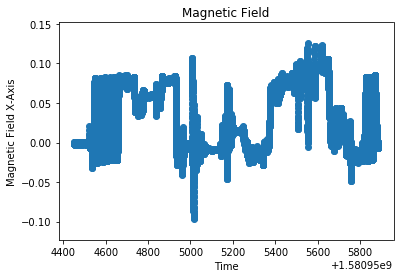

In [24]:
plt.scatter(mag_data.secs, mag_data.x)
plt.xlabel('Time')
plt.ylabel('Magnetic Field X-Axis')
plt.title('Magnetic Field')
plt.show()

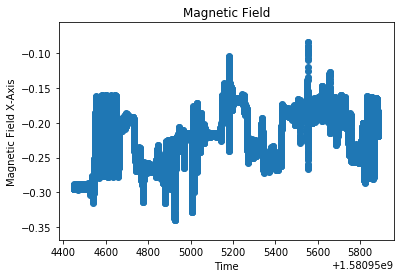

In [25]:
plt.scatter(mag_data.secs, mag_data.y)
plt.xlabel('Time')
plt.ylabel('Magnetic Field X-Axis')
plt.title('Magnetic Field')
plt.show()

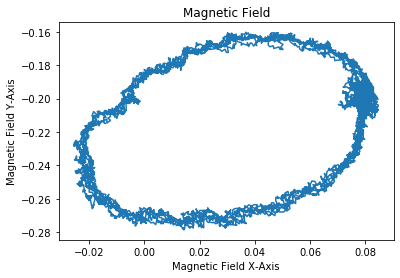

In [26]:
mag_test = mag_data[4000:10000]
plt.plot(mag_test.x, mag_test.y)
plt.xlabel('Magnetic Field X-Axis')
plt.ylabel('Magnetic Field Y-Axis')
plt.title('Magnetic Field')
plt.show()

In [27]:
mag_test.head(5)
alpha = (max(mag_test.x) + min(mag_test.x))/2
print(alpha)

0.029649998992649994


In [28]:
mag_test.x = mag_test.x - mag_test.x.mean()
mag_test.y = mag_test.y - mag_test.y.mean()

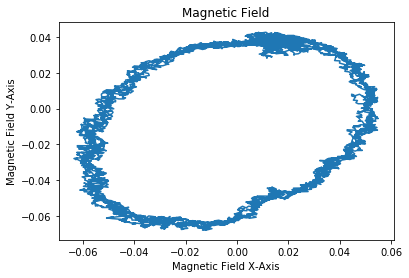

In [29]:
plt.plot(mag_test.y, mag_test.x, markevery = 100)
plt.xlabel('Magnetic Field X-Axis')
plt.ylabel('Magnetic Field Y-Axis')
plt.title('Magnetic Field')
plt.show()

In [30]:
x_max = max(mag_test.x)
y_max = max(mag_test.y)
print(x_max)
print(y_max)

0.042635714156712565
0.05497994846357948


In [31]:
### Calculate rotation angle 
theta = np.arcsin(y_max/np.sqrt(x_max**2+y_max**2))
print(theta)

0.9111879931457887


In [45]:
### calculate rotation matrix 
rotation_matrix = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])

In [46]:
df = pd.DataFrame()
df['x'] = mag_test.x
df['y'] = mag_test.y
df.shape

(6000, 2)

In [47]:
### Multiply 
t = np.matmul(rotation_matrix,np.array(df).T)

In [48]:
### Calculate the ratio and divide the corrected X with ratio'
ratio = np.max(t[0])/np.max(t[1])
ratio

1.009850819707217

In [49]:
t[0] = t[0]/ratio

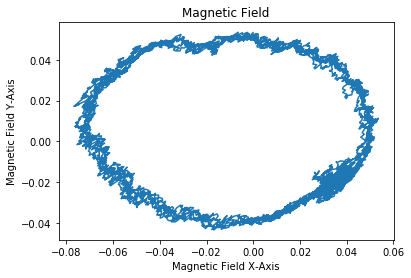

In [50]:
plt.plot(t[0], t[1], markevery = 100)
plt.xlabel('Magnetic Field X-Axis')
plt.ylabel('Magnetic Field Y-Axis')
plt.title('Magnetic Field')
plt.show()

In [51]:
yaw = np.arctan2(-mag_data.y,mag_data.x)
yaw.head(5)

0    1.574534
1    1.574560
2    1.572855
3    1.573175
4    1.576261
dtype: float64

In [53]:
yaw_mag_integrate = it.cumtrapz(yaw, x = mag_data.secs, initial=0)

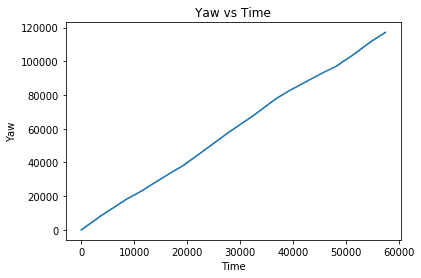

In [444]:
plt.plot(yaw_mag_integrate, markevery = 100)
plt.xlabel('Time')
plt.ylabel('Yaw')
plt.title('Yaw vs Time')
plt.show()

In [453]:
def quaternion_to_euler(x, y, z, w):

    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    roll = 180 * math.atan2(t0, t1) / np.pi
    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch = 180 * math.asin(t2) / np.pi
    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    yaw = 180 * (math.atan2(t3, t4)) / np.pi
    return [yaw, pitch, roll]

In [454]:
yaw_gps_list = []
pitch_gps_list = []
angle_gps_list = []
for i in range(0, len(imu_data.qx)):
    yaw, pitch, angle = quaternion_to_euler(imu_data.iloc[i].qx, imu_data.iloc[i].qy, imu_data.iloc[i].qz, imu_data.iloc[i].qw)
    yaw_gps_list.append(yaw)
    pitch_gps_list.append(pitch)
    angle_gps_list.append(angle)


In [455]:
yaw_gps = pd.DataFrame(yaw_gps_list)
yaw_gps.head(5)

,0
0,82.988998
1,82.987000
2,82.987000
3,82.986999
4,82.986000


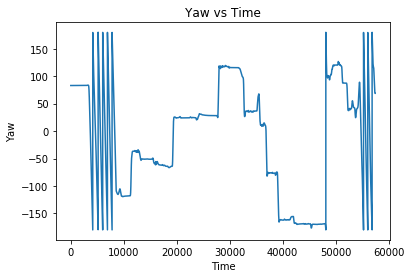

In [460]:
plt.plot(yaw_gps, markevery = 100)
plt.xlabel('Time')
plt.ylabel('Yaw')
plt.title('Yaw vs Time')
plt.show()

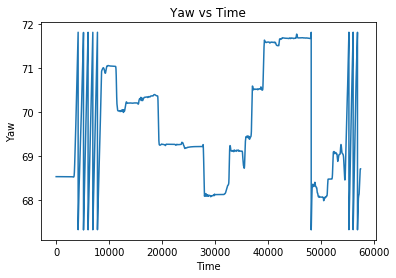

In [468]:
complemented_yaw = alpha*yaw_gps + (1-alpha)*yaw
plt.plot(complemented_yaw, markevery = 100)
plt.xlabel('Time')
plt.ylabel('Yaw')
plt.title('Yaw vs Time')
plt.show()

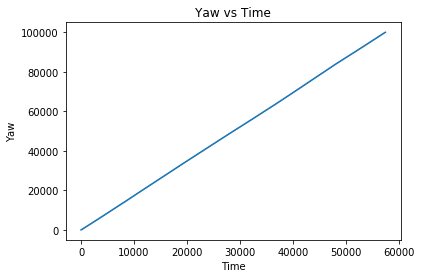

In [472]:
complement_yaw_integrate = it.cumtrapz(complemented_yaw[0], x = imu_data.secs, initial=0)
plt.plot(complement_yaw_integrate, markevery = 100)
plt.xlabel('Time')
plt.ylabel('Yaw')
plt.title('Yaw vs Time')
plt.show()

In [104]:
utm_east = gps_data.easting
utm_north = gps_data.northing

<function matplotlib.pyplot.show(*args, **kw)>

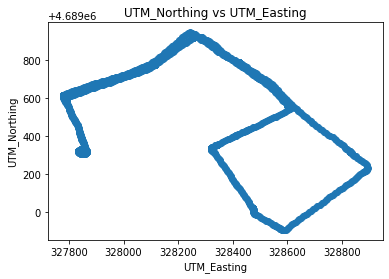

In [105]:
plt.scatter(utm_east, utm_north)
plt.xlabel('UTM_Easting')
plt.ylabel('UTM_Northing')
plt.title('UTM_Northing vs UTM_Easting')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

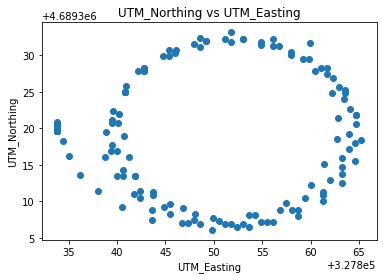

In [120]:
plt.scatter(utm_east[:210], utm_north[:210])
plt.xlabel('UTM_Easting')
plt.ylabel('UTM_Northing')
plt.title('UTM_Northing vs UTM_Easting')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

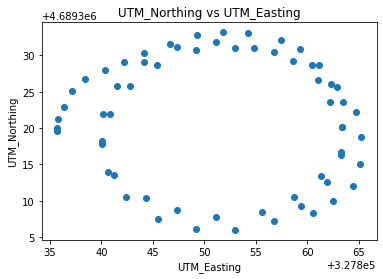

In [126]:
plt.scatter(utm_east[1375:], utm_north[1375:])
plt.xlabel('UTM_Easting')
plt.ylabel('UTM_Northing')
plt.title('UTM_Northing vs UTM_Easting')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

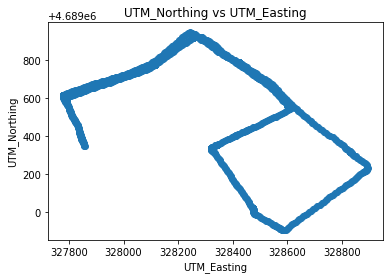

In [134]:
plt.scatter(utm_east[220:1360], utm_north[220:1360])
plt.xlabel('UTM_Easting')
plt.ylabel('UTM_Northing')
plt.title('UTM_Northing vs UTM_Easting')
plt.show

In [106]:
import math

def calculatePosn(x, y):
    dist = math.sqrt(x**2 + y**2)
    return dist

def calculateVelocity(distance, tim):
    return (distance / tim)

In [135]:
velocity = []
for j in range(220, 1360):
    pos = calculatePosn((gps_data.iloc[j+1].northing - gps_data.iloc[j].northing),(gps_data.iloc[j+1].easting - gps_data.iloc[j].easting))
    duration = (gps_data.iloc[j+1].secs + (gps_data.iloc[j+1].nsecs / 10**9) ) -  (gps_data.iloc[j].secs + (gps_data.iloc[j].nsecs / 10**9) )
    vel = calculateVelocity(pos, duration)
    velocity.append(vel)
velocity.append(0)

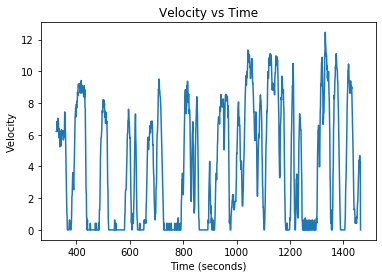

In [138]:
plt.plot(gps_data.seq[220:1361], velocity)
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity')
plt.title('Velocity vs Time')
plt.show()

In [140]:
# Calculating Velocity from GPS data
vel_df = pd.DataFrame(velocity)
print('Mean Velocity:', vel_df[0].mean())
distance = it.cumtrapz(vel_df[0], x = gps_data.seq[220:1361], initial=0)
print('Total distance Covered: ', str(distance[-1]) + "m")

Mean Velocity: 4.00973599049461
Total distance Covered:  4572.0012079450125m


In [141]:
# Calculating velocity from Acceleration data
lin_acc_raw = imu_data.lx
imu_dur_raw = (imu_data.secs + (imu_data.nsecs/(10**9)))
import scipy.integrate as it
lin_vel_imu = it.cumtrapz(lin_acc, x = imu_dur, initial=0)

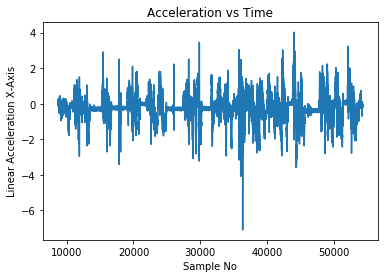

In [394]:
plt.plot(lin_acc[:])
plt.xlabel('Sample No')
plt.ylabel('Linear Acceleration X-Axis')
plt.title('Acceleration vs Time')
plt.show()

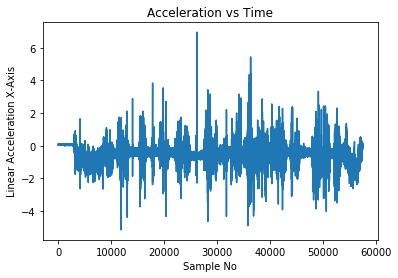

In [395]:
lin_acc_y = imu_data.ly
plt.plot(lin_acc_y[:])
plt.xlabel('Sample No')
plt.ylabel('Linear Acceleration X-Axis')
plt.title('Acceleration vs Time')
plt.show()

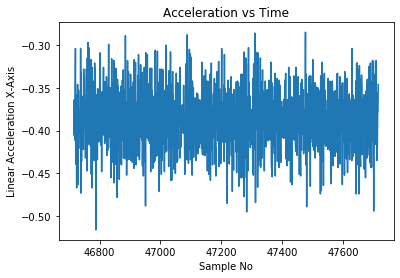

In [388]:
plt.plot(lin_acc[38000:39000])
plt.xlabel('Sample No')
plt.ylabel('Linear Acceleration X-Axis')
plt.title('Acceleration vs Time')
plt.show()

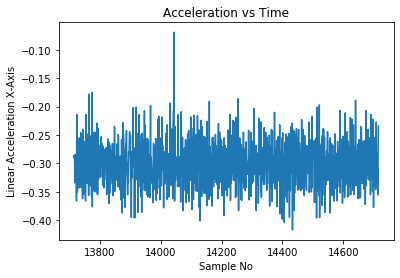

In [389]:
plt.plot(lin_acc[5000:6000])
plt.xlabel('Sample No')
plt.ylabel('Linear Acceleration X-Axis')
plt.title('Acceleration vs Time')
plt.show()

In [405]:
stationary_error = 0.05421955866010504 # Mean Linear Acceleration in X axis when the IMU is in stationary position
manual_bias = 0.01
lin_acc_mean_error = lin_acc[5000:6000].mean() + stationary_error + manual_bias
lin_acc_mean_error

-0.23639344112189525

In [406]:
lin_acc = lin_acc_raw[8716:54318]
imu_dur = imu_dur_raw[8716:54318]

In [407]:
lin_vel_1 = it.cumtrapz(lin_acc, x = imu_dur, initial=0)

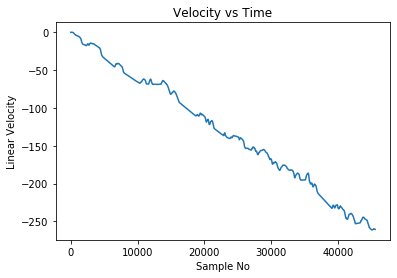

In [408]:
plt.plot(lin_vel_1[:])
plt.xlabel('Sample No')
plt.ylabel('Linear Velocity')
plt.title('Velocity vs Time')
plt.show()

In [409]:
lin_acc.head(5)

8716   -0.035
8717    0.134
8718    0.028
8719   -0.086
8720   -0.020
Name: lx, dtype: float64

In [410]:
lin_acc_mod1 = lin_acc - lin_acc_mean_error
lin_vel_mod1 = it.cumtrapz(lin_acc_mod1, x = imu_dur, initial=0)

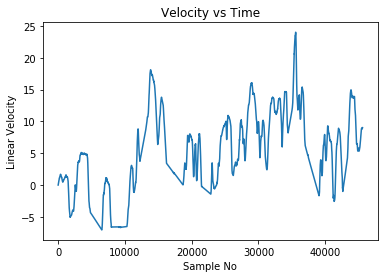

In [411]:
plt.plot(lin_vel_mod1[:])
plt.xlabel('Sample No')
plt.ylabel('Linear Velocity')
plt.title('Velocity vs Time')
plt.show()

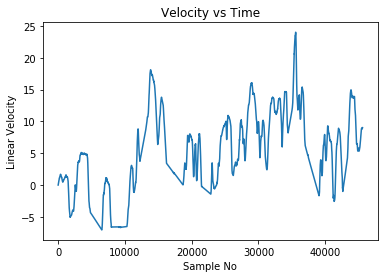

In [412]:
plt.plot(lin_vel_mod1[:])
plt.xlabel('Sample No')
plt.ylabel('Linear Velocity')
plt.title('Velocity vs Time')
plt.show()

In [413]:
lin_vel_mod1.mean()

4.702405411862919

In [414]:
lin_distance = it.cumtrapz(lin_vel_mod1, x = imu_dur, initial=0)

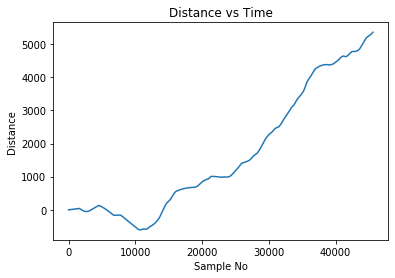

Distance: 5360.614143697315


In [416]:
plt.plot(lin_distance[:])
plt.xlabel('Sample No')
plt.ylabel('Distance')
plt.title('Distance vs Time')
plt.show()
print("Distance: "+str(lin_distance[-1]))